In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
loan=pd.read_csv('train_ctrUa4K.csv')
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Data Visulization

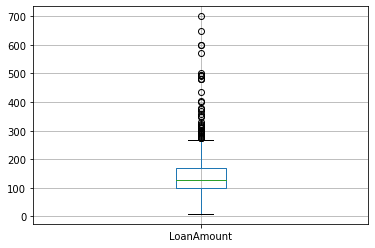

In [5]:
loan.boxplot(column='LoanAmount')

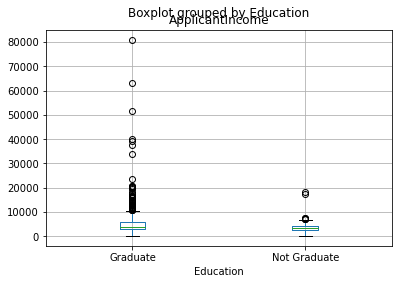

In [6]:
loan.boxplot(column='ApplicantIncome',by='Education')

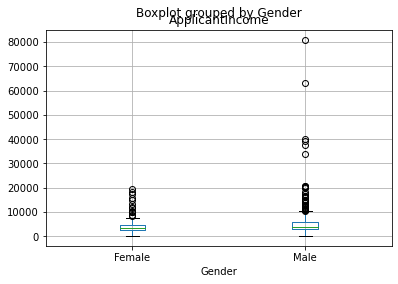

In [7]:
loan.boxplot(column='ApplicantIncome',by='Gender')

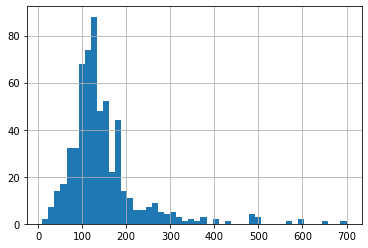

In [8]:
loan['LoanAmount'].hist(bins=50)

In [9]:
def missing(x):
    return sum(x.isnull())
loan.apply(missing,axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
from scipy.stats import mode
mode(loan['Gender'])

ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

In [11]:
mode(loan['Gender']).mode[0]

'Male'

In [12]:
mode(loan['Dependents'])

ModeResult(mode=array(['0'], dtype=object), count=array([345]))

In [13]:
loan['Gender']=loan['Gender'].fillna(mode(loan['Gender']).mode[0])
loan['Married']=loan['Married'].fillna(mode(loan['Married']).mode[0])
loan['Dependents']=loan['Dependents'].fillna(mode(loan['Dependents']).mode[0])
loan['Self_Employed']=loan['Self_Employed'].fillna(mode(loan['Self_Employed']).mode[0])
loan.apply(missing,axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

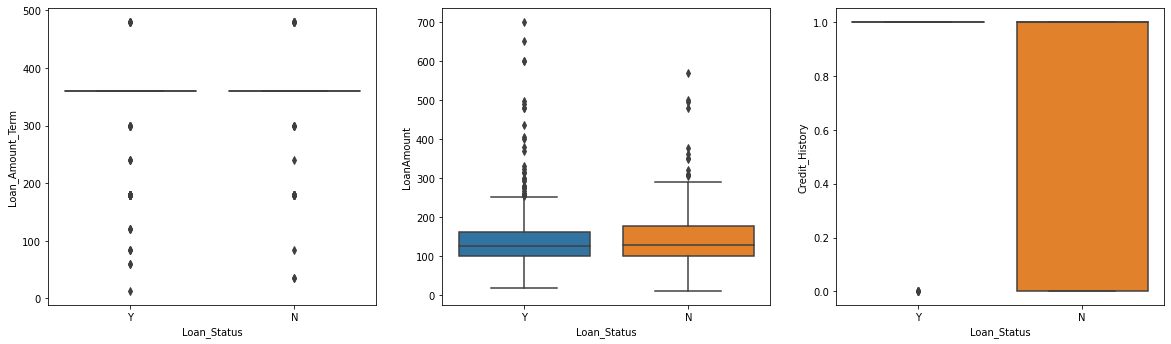

In [14]:
import seaborn as sns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(y='Loan_Amount_Term',x='Loan_Status',data=loan)
plt.subplot(2,3,2)
sns.boxplot(y='LoanAmount',x='Loan_Status',data=loan)
plt.subplot(2,3,3)
sns.boxplot(y='Credit_History',x='Loan_Status',data=loan)
plt.show()

In [15]:
pvt = loan.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed","Dependents"], aggfunc=np.mean)
pvt

LoanAmount
Gender Married Self_Employed Dependents            
Female No      No            0           108.851852
                             1           105.800000
                             2           129.000000
                             3+          302.500000
               Yes           0           130.750000
                             1           106.000000
       Yes     No            0           120.722222
                             1           219.000000
                             2           115.000000
               Yes           0           121.500000
                             1           443.000000
Male   No      No            0           127.642105
                             1           126.142857
                             2           126.833333
                             3+          217.666667
               Yes           0           178.769231
                             1           151.333333
                             3+          292.000000
       Yes     No            0           149.042553
                             1           159.559322
                             2           142.014286
                             3+          185.729730
               Yes           0           140.625000
                             1           160.181818
                             2           212.466667
                             3+          155.333333

### Encoding

In [16]:
varlist=["Married","Self_Employed","Loan_Status"]
def binary_map(x):
    return x.map({"Yes":1,"No":0,"N":0,"Y":1})
loan[varlist]=loan[varlist].apply(binary_map)
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,Graduate,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [20]:
pvt1=loan.pivot_table(values="Loan_Status",index="Credit_History",aggfunc=np.mean)
pvt1

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [33]:
coun=loan['Credit_History'].value_counts(ascending=True)
coun

0.0     89
1.0    475
Name: Credit_History, dtype: int64

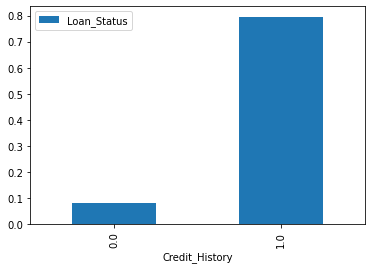

In [40]:
pvt1.plot(kind="bar")

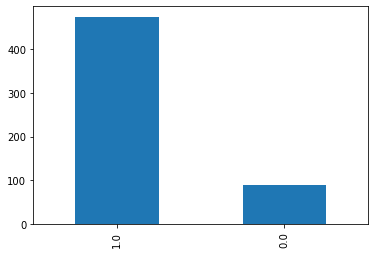

In [31]:
coun.plot(kind="bar")

In [41]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'